---

<H1> <center>Filtrage de Fourier</center></H1>

---

<h1>Table des matières<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Documentation" data-toc-modified-id="Documentation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Documentation</a></span><ul class="toc-item"><li><span><a href="#scipy.fft.fft-:" data-toc-modified-id="scipy.fft.fft-:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>scipy.fft.fft :</a></span></li><li><span><a href="#scipy.fft.rfft-:" data-toc-modified-id="scipy.fft.rfft-:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>scipy.fft.rfft :</a></span></li><li><span><a href="#Conséquences" data-toc-modified-id="Conséquences-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Conséquences</a></span></li></ul></li><li><span><a href="#Objectif" data-toc-modified-id="Objectif-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Objectif</a></span></li><li><span><a href="#Réprésentation-temporelle-d'un-signal" data-toc-modified-id="Réprésentation-temporelle-d'un-signal-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Réprésentation temporelle d'un signal</a></span></li><li><span><a href="#Réprésentation-spectrale-d'un-signal" data-toc-modified-id="Réprésentation-spectrale-d'un-signal-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Réprésentation spectrale d'un signal</a></span></li><li><span><a href="#Filtrage-numérique-en-appliquant-la-fonction-de-transfert-à-chacune-des-harmoniques" data-toc-modified-id="Filtrage-numérique-en-appliquant-la-fonction-de-transfert-à-chacune-des-harmoniques-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Filtrage numérique en appliquant la fonction de transfert à chacune des harmoniques</a></span></li><li><span><a href="#Filtrage-numérique-en-appliquant-une-relation-de-récurrence" data-toc-modified-id="Filtrage-numérique-en-appliquant-une-relation-de-récurrence-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Filtrage numérique en appliquant une relation de récurrence</a></span></li></ul></div>

> __Objectifs du BO :__
>
> - Capacité numérique : calculer, à l’aide d’un langage de programmation, la transformée de Fourier discrète d’un signal numérique
> - Calculer la transformée de Fourier discrète d’un signal à valeurs réelles en utilisant la fonction rfft de la bibliothèque numpy.fft (sa spécification étant donnée).


In [ ]:
<div style="page-break-after: always;"></div>

---

## Documentation

---

> Vous trouverez ci-après les `docstring` des fonctions à utiliser pour obtenir la transformée de Fourier discrète d'un signal 1D à valeurs réelles. Elles appartiennent à la librairie `scipy.fft`.

### scipy.fft.fft :

__scipy.fft.fft(x, n=None, axis=- 1, norm=None, overwrite_x=False, workers=None, *, plan=None)__

Compute the 1-D discrete Fourier Transform for real input.

This function computes the 1-D n-point discrete Fourier Transform (DFT) of a real-valued array by means of an efficient algorithm called the Fast Fourier Transform (FFT).

Parameters :

- xarray_like: Input array
- n :int, optional
  Number of points along transformation axis in the input to use.<br>
  If n is smaller than the length of the input, the input is cropped.<br>
  If it is larger, the input is padded with zeros.
  If n is not given, the length of the input along the axis specified by axis is used.
- axisint, optional<br>
  Axis over which to compute the FFT. If not given, the last axis is used.
- norm{“backward”, “ortho”, “forward”}, optional
  Normalization mode (see fft). Default is “backward”.
- overwrite_xbool, optional
  If True, the contents of x can be destroyed; the default is False. See fft for more details.
- workersint, optional
  Maximum number of workers to use for parallel computation.<br>
  If negative, the value wraps around from os.cpu_count(). See fft for more details.
- planobject, optional
  This argument is reserved for passing in a precomputed plan provided by downstream FFT vendors.<br>
  It is currently not used in SciPy.
  


---

__Notes :__

FFT (Fast Fourier Transform) refers to a way the discrete Fourier Transform (DFT) can be calculated efficiently, by using symmetries in the calculated terms. The symmetry is highest when n is a power of 2, and the transform is therefore most efficient for these sizes. For poorly factorizable sizes, scipy.fft uses Bluestein’s algorithm [2] and so is never worse than O(n log n). Further performance improvements may be seen by zero-padding the input using next_fast_len.

If x is a 1d array, then the fft is equivalent to :

```python
    y[k] = np.sum(x * np.exp(-2j * np.pi * k * np.arange(n)/n))
```
    
The frequency term $f=k/n$ is found at $y[k]$. At $y[n/2]$ we reach the Nyquist frequency and wrap around to the negative-frequency terms. So, for an 8-point transform, the frequencies of the result are $[0, 1, 2, 3, -4, -3, -2, -1]$.<br>
To rearrange the fft output so that the zero-frequency component is centered, like $[-4, -3, -2, -1, 0, 1, 2, 3]$, use `fftshift`.

Transforms can be done in single, double, or extended precision (long double) floating point.<br>
Half precision inputs will be converted to single precision and non-floating-point inputs will be converted to double precision.

If the data type of x is real, a “real FFT” algorithm is automatically used, which roughly halves the computation time.<br>
To increase efficiency a little further, use rfft, which does the same calculation, but only outputs half of the symmetrical spectrum.<br>
If the data are both real and symmetrical, the dct can again double the efficiency, by generating half of the spectrum from half of the signal.

### scipy.fft.rfft :

__scipy.fft.rfft(x, n=None, axis=- 1, norm=None, overwrite_x=False, workers=None, *, plan=None)__

Compute the 1-D discrete Fourier Transform for real input.

This function computes the 1-D n-point discrete Fourier Transform (DFT) of a real-valued array by means of an efficient algorithm called the Fast Fourier Transform (FFT).

Parameters :

- xarray_like: Input array
- n :int, optional
  Number of points along transformation axis in the input to use.<br>
  If n is smaller than the length of the input, the input is cropped.<br>
  If it is larger, the input is padded with zeros.
  If n is not given, the length of the input along the axis specified by axis is used.
- axisint, optional<br>
  Axis over which to compute the FFT. If not given, the last axis is used.
- norm{“backward”, “ortho”, “forward”}, optional
  Normalization mode (see fft). Default is “backward”.
- overwrite_xbool, optional
  If True, the contents of x can be destroyed; the default is False. See fft for more details.
- workersint, optional
  Maximum number of workers to use for parallel computation.<br>
  If negative, the value wraps around from os.cpu_count(). See fft for more details.
- planobject, optional
  This argument is reserved for passing in a precomputed plan provided by downstream FFT vendors.<br>
  It is currently not used in SciPy.

---
  
__Notes :__

When the DFT is computed for purely real input, the output is Hermitian-symmetric, i.e., the negative frequency terms are just the complex conjugates of the corresponding positive-frequency terms, and the negative-frequency terms are therefore redundant. This function does not compute the negative frequency terms, and the length of the transformed axis of the output is therefore `n//2 + 1`.

When `X = rfft(x)` and $fs$ is the sampling frequency, $X[0]$ contains the zero-frequency term 0*fs, which is real due to Hermitian symmetry.

If n is even, $A[-1]$ contains the term representing both positive and negative Nyquist frequency (+fs/2 and -fs/2), and must also be purely real. If n is odd, there is no term at fs/2; $A[-1]$ contains the largest positive frequency (fs/2*(n-1)/n), and is complex in the general case.

If the input a contains an imaginary part, it is silently discarded.

### Conséquences

Si le vecteur de base est réel, il est conseillé d'utiliser la version `rfft`.<br>
L'optimisation est effective mais pour la mettre en oeuvre il est souhaitable d'utiliser un nombre d'échantillons pairs.

---

## Objectif

---

Le but de cet exercice est : 

- de construire un signal périodique à partir d'une supersposition de signaux sinusoïdaux en vertu du thérorème de Fourier
- de tracer son spectre
- de réaliser un filtrage analogique en appliquant la fonction de transfert à chacune des harmoniques
- de réaliser un filtrage numérique à l'aide d'une relation de récurrence

    
On s'appuiera sur la trame d'un exercice dont l'énoncé est reproduit ci-dessous (attention, f0 fait ici référence à la fréquence fondamentale du signal créneau, à ne pas confondre avec la fréquence d'échantionnage qui sera notée fe).

__Librairies utiles :__

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import square
plt.rcParams['axes.xmargin'] = 0

from scipy.fft import rfft,irfft,rfftfreq

%matplotlib inline


> __Note :__
> la librairie `fftpack` est désormais considérée comme obsolète.<br>
> L'usage de sa version moderne est recommandée.

---

## Réprésentation temporelle d'un signal

---

1. Rédiger ci-dessous un code en langage python permettant de tracer le signal :
$$s_1(t) \;=A\; \cos{(2\pi f_0 t)}$$
avec $A=1 V$, $f_0=1000 Hz$ entre $t_{min}=0$ et $t_{max}=5$ ms avec $N=1000$  points.


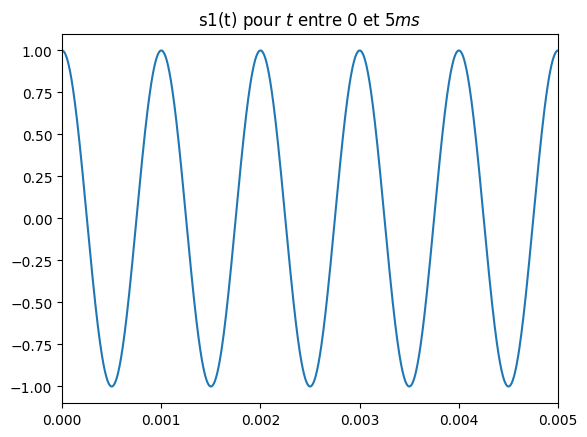

In [2]:
A = 1
f0 = 1000
def s1(t):
    return A*np.cos(2*np.pi*f0*t)
tmin = 0
tmax = 5e-3
N = 1000
times = np.linspace(tmin, tmax, N)
sig1 = s1(times)
plt.cla()
plt.title("s1(t) pour $t$ entre $0$ et $5ms$ ")
plt.plot(times, sig1)
plt.show()

2. Rédiger ci-dessous un code en langage python permettant de tracer le signal :
$$s_2(t)\;=A\;\cos{(2\pi f_0 t)}+\dfrac{A}{2}\; \sin{(2\pi f_0 t)}$$ toujours avec $A=1 V$, $f_0=1000 Hz$ entre $t_{min}=0$ et $t_{max}=5$ ms avec $N=1000$  points.

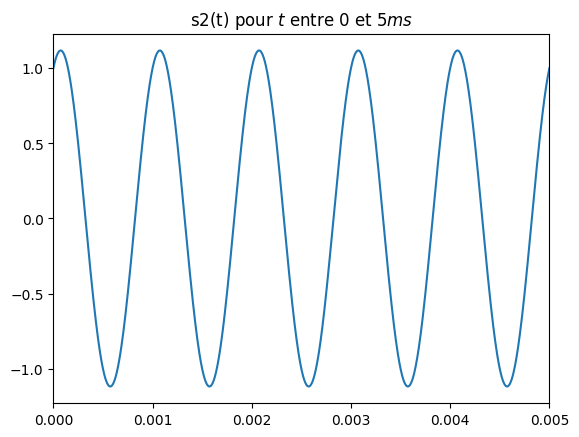

In [3]:
A = 1
f0 = 1E3
def s2(t):
    return A*np.cos(2*np.pi*f0*t) + (A/2)*np.sin(2*np.pi*f0*t)
tmin = 0
tmax = 5e-3
N = 1000
times = np.linspace(tmin, tmax, N)
sig2 = s2(times)
plt.clf()
plt.title("s2(t) pour $t$ entre $0$ et $5ms$ ")
plt.plot(times, sig2)
plt.show()

- Montrez que ce signal peut se mettre sous la forme :
$$s_2(t)\;=B\;\cos{(2\pi f_0 t + \theta)}$$
Déterminez les valeurs de $(B,\theta)$ et vérifiez l'identité avec le signal initial en traçant cette dernière expression.

<br>

- Enfin on définit le signal $e_1(t)$ comme :
$$e_1(t) = A + s_1(t) \;=A\; \left( 1 + \cos{(2\pi f_0 t) } \right)$$
Ajoutez la représentation de ce signal à vos traçés.



3. Rédiger ci-dessous un code en langage python permettant de tracer un signal rectangulaire d'amplitude $A=1$ V et de fréquence $f_0=1000 Hz$, toujours entre $t_{min}=0$ et $t_{max}=5$ ms avec $N=1000$ points.<br>
Vous tracerez le signal créneau défini simplement en représentation temporelle, et sa version approchée construite par synthèse de Fourier. Vous vous limiterez aux 30 premières harmoniques.

> On rappelle la décomposition en série de Fourier d'un signal rectangulaire impair : $$s_3(t)=\cfrac{4A}{\pi}\sum_{k=0}^{\infty}\cfrac{\sin{\left(2 \pi [2 k + 1] f_0 t\right)}}{2 k + 1}$$

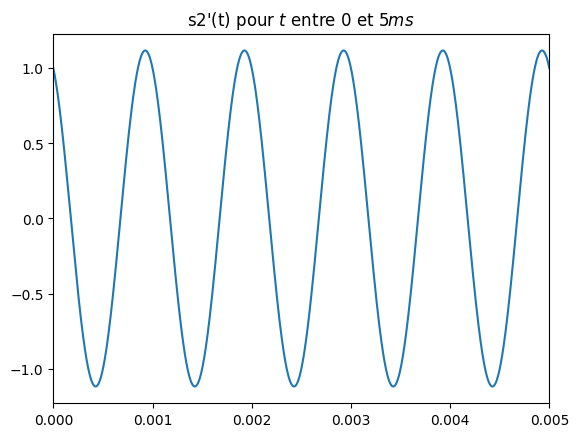

In [4]:
C = A*(1+0.5j)
B = np.abs(C)
theta = np.angle(C)
def s2b(t) :
    return B*np.cos(2*np.pi*f0*t + theta)

tmin = 0
tmax = 5e-3
N = 1000
times = np.linspace(tmin, tmax, N)
sig2b = s2b(times)
plt.clf()
plt.title("s2'(t) pour $t$ entre $0$ et $5ms$ ")
plt.plot(times, sig2b)
plt.show()

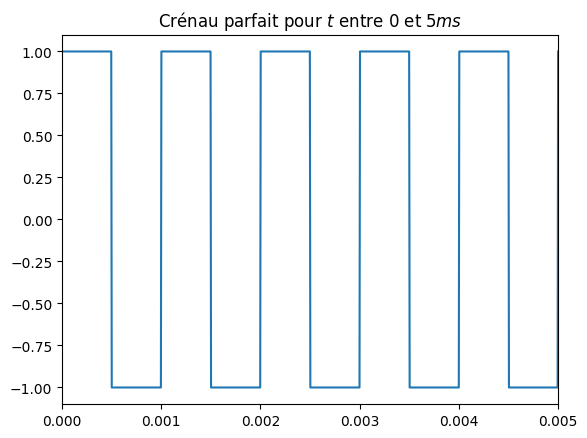

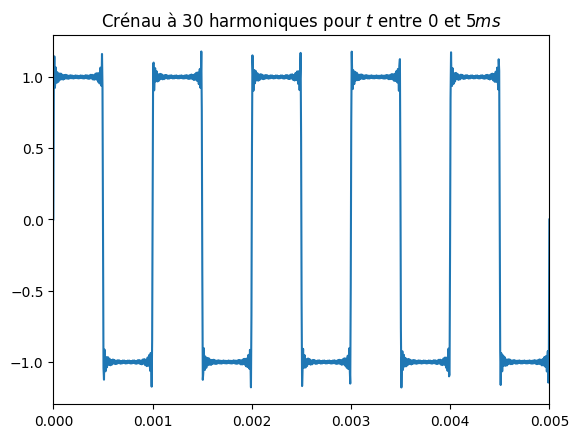

In [5]:
A = 1
f0 = 1E3
#def crenau(t):
#    return A*square(2*np.pi*f0*t)

def crenau(t, f):
    u = np.remainder(f*t, 1)
    return 1-2*np.heaviside(u-0.5, 0)


def crenau_bis(t):
    res = 0
    for k in range(30):
        res += np.sin(2*np.pi*(2*k+1)*f0*t)/(2*k+1)
    return 4*(A/np.pi) * res
tmin = 0
tmax = 5e-3
N = 1000
times = np.linspace(tmin, tmax, N)
cren = crenau(times, f0)
plt.clf()
plt.title("Crénau parfait pour $t$ entre $0$ et $5ms$ ")
plt.plot(times, cren)
plt.show()
plt.title("Crénau à 30 harmoniques pour $t$ entre $0$ et $5ms$")
crenb = crenau_bis(times)
plt.plot(times, crenb)
plt.show()

In [ ]:
<div style="page-break-after: always;"></div>

---

## Réprésentation spectrale d'un signal

---

4. Calculer et afficher  :
 - la période d'échantillonnage $T_e$,
 - la fréquence d'échantillonnage $f_e$
 - et la résolution spectrale $\Delta f_{min}$.

In [6]:
# Code déjà rempli
# période d'échantillonnage : 
Te = (tmax-tmin)/N
# fréquence d'échantillonnage:
fe = 1/Te
# résolution spectrale
Deltaf = fe/N
print(f'Te ={Te:1.3E} s,fe = {fe:1.3E} Hz, Delta f_min = {Deltaf:1.3E} Hz')

Te =5.000E-06 s,fe = 2.000E+05 Hz, Delta f_min = 2.000E+02 Hz


5. A partir des expressions temporelles, déterminez les spectres des signaux précédents.<br>
Représenter ces derniers en limitant l'axe des fréquences à $f_{max}=10000 Hz$.

Spectre de $s_1(t)$: $$S_1(f) = \cfrac{A}{2}$$
Spectre de $s_2(t)$: $$S_2(f) = \cfrac{A}{2}$$
Spectre de $s_{2b}(t)$: $$S_{2b}(f) = \cfrac{A}{2}$$
Spectre de $creneau(t)$: $$S_{creneau}(f) = \sum_{k=0}^\infty \frac{A}{2k+1}$$


6. Rédiger ci-dessous un code en langage python permettant de tracer le spectre des différents signaux précédents en utilisant la fonction `rfft` et en limitant l'axe des fréquences à $f_{max}=10000 Hz$.

In [7]:
def affiche_spectre(sig, fe, fmax):
    N = len(sig)
    sig_fft = rfft(sig)
    freqs = rfftfreq(N, 1/fe)
    plt.clf()
    plt.title("Spectre du signal")
    plt.plot(freqs, np.abs(sig_fft))
    plt.xlim(0, fmax)
    plt.show()
    return sig_fft

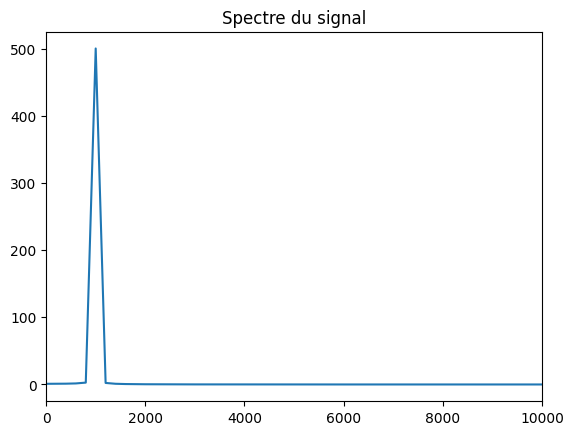

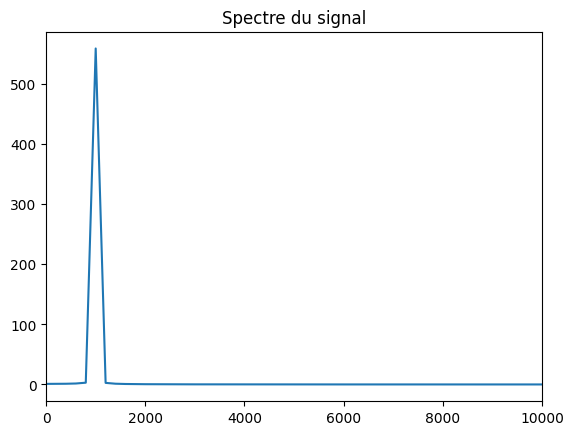

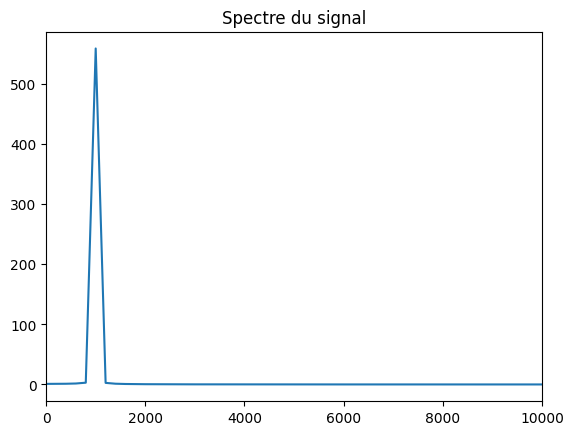

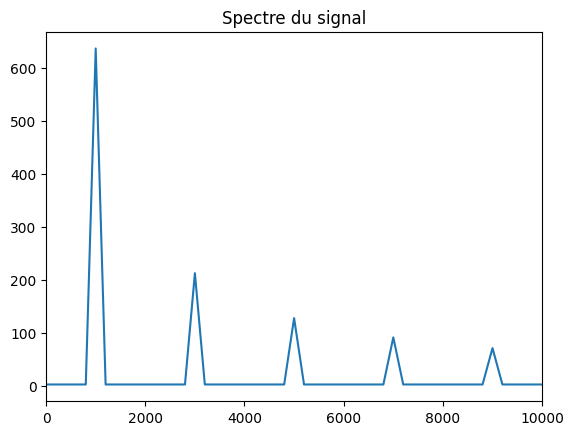

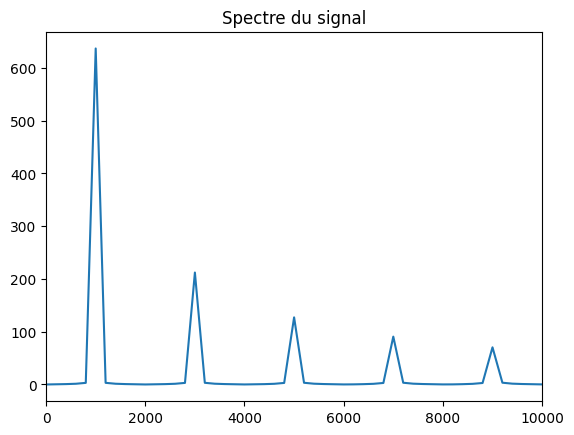

In [8]:
spsig1 = affiche_spectre(sig1, fe, 10E3)
spsig2 = affiche_spectre(sig2, fe, 10E3)
spsig2b = affiche_spectre(sig2b, fe, 10E3)
spcren = affiche_spectre(cren, fe, 10E3)
spcrenb = affiche_spectre(crenb, fe, 10E3)



---

## Filtrage numérique en appliquant la fonction de transfert à chacune des harmoniques

---

7. Reproduire l'effet du filtre passe-base d'ordre 1 sur le signal créneau, de fonction de transfert :
$$\underline{H}=\cfrac{1}{1+j\cfrac{f}{f_c}}\qquad avec\qquad fc=0.1*f_0$$

Le gain et la phase sont donnés par :
$$G(f)=\cfrac{1}{\sqrt{1+\left(\cfrac{f}{f_c}\right)^2}} \qquad et \qquad \varphi(f)=- argument\left(1 + j\cfrac{f}{f_c}\right)$$

/var/folders/f3/68h644h17rzcj7c0b9062v240000gn/T/ipykernel_3623/297937851.py:13: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(freqs), G(freqs))


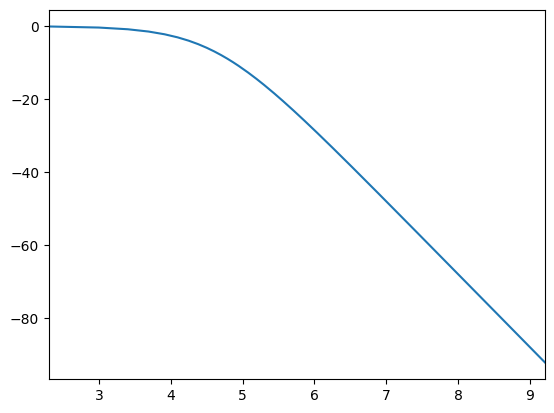

/var/folders/f3/68h644h17rzcj7c0b9062v240000gn/T/ipykernel_3623/297937851.py:15: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(freqs), phi(freqs))


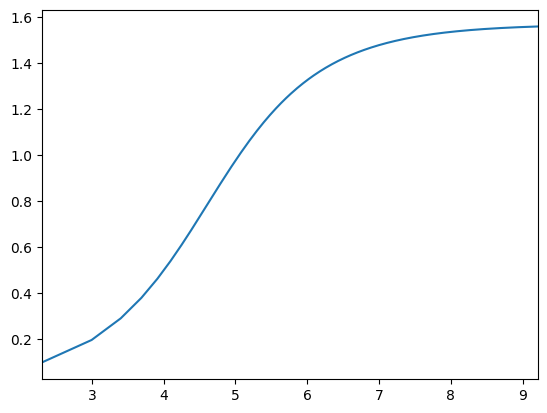

In [9]:
f0 = 1000
fc = 0.1*f0
freqs = np.linspace(0, 10*f0, N)
# Filtre 1 : passe bas d'ordre 1 avec fc=0.1*f0
def H(f):
    return 1/(1+1j*(f/fc))
def G(f):
    return (20*np.log(np.abs(H(f))))
def phi(f):
    return -np.angle(H(f))

plt.clf()
plt.plot(np.log(freqs), G(freqs))
plt.show()
plt.plot(np.log(freqs), phi(freqs))
plt.show()

8. Reproduire la sorties des filtres passe-bas d'ordre 2 en utilisant la même méthode.<br>
Pour les plus motivés, reproduire également la sortie d'un filtre passe-bande sur l'harmonique 5.


/var/folders/f3/68h644h17rzcj7c0b9062v240000gn/T/ipykernel_3623/2507783765.py:13: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(freqs), G2(freqs))


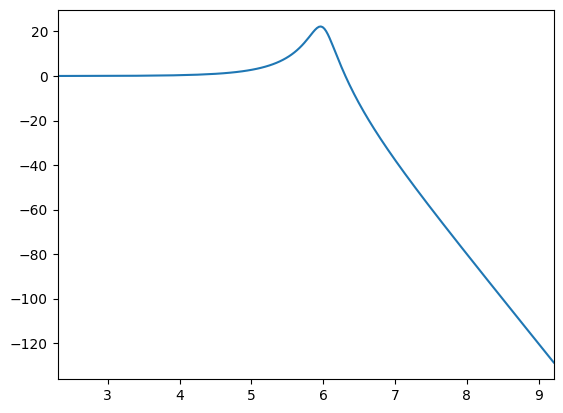

/var/folders/f3/68h644h17rzcj7c0b9062v240000gn/T/ipykernel_3623/2507783765.py:15: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(freqs), phi2(freqs))


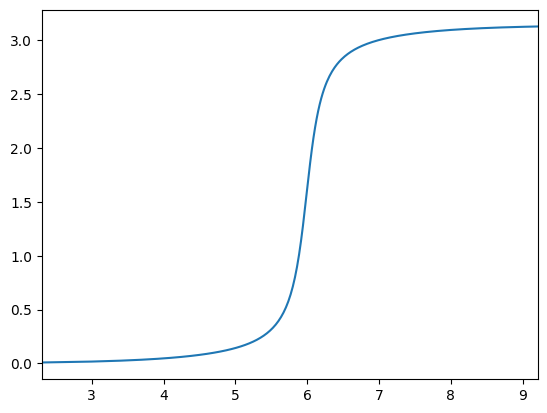

In [10]:
# Filtre 2 : passe bas d'ordre 2 avec fc=0.4*f0
#Fonction de transfert d'un filtre d'ordre 2 : 
fc = 0.4*f0
Q = 3
def H2(f):
    return 1/(1+1j*(f/fc)/Q-(f/fc)**2)
def G2(f):
    return (20*np.log(np.abs(H2(f))))
def phi2(f):
    return -np.angle(H2(f))

plt.clf()
plt.plot(np.log(freqs), G2(freqs))
plt.show()
plt.plot(np.log(freqs), phi2(freqs))
plt.show()
# Code à remplir

In [ ]:
<div style="page-break-after: always;"></div>

---

## Filtrage numérique en appliquant une relation de récurrence

---

9. Reproduire à nouveau l'effet du filtre passe-bas sur le signal créneau, sachant que la fonction de transfert analogique d'un filtre passe-bas du premier ordre est :
$$
\underline{H}(j\omega) = \frac{1}{1 + j\dfrac{\omega}{\omega_c}} = \frac{\underline{s}(t)}{\underline{e}(t)}
$$
où $\omega_c$ est la pulsation de coupure. Lorsqu'on repasse dans le domaine temporel, cela correspond à l'équation différentielle :
$$
\boxed{\underline{e}(t) = \underline{s}(t) + \frac{1}{\omega_c}\, j\omega\, \underline{s}(t) \hspace{0.2cm} \Longrightarrow \hspace{0.2cm} \frac{1}{\omega_c}\, \frac{ds}{dt} + s = e(t)}
$$

> Pour des données numériques échantillonnées avec une période $T_e$, l'idée est de remplacer la dérivée temporelle $\dot{s}$ par le taux d'accroissement :
$$
\frac{ds}{dt}(t) \hspace{0.2cm} \longleftrightarrow \hspace{0.2cm} \frac{s_n - s_{n-1}}{T_e}
$$
> ce qui permet de transformer l'équation différentielle en :
$$
\boxed{\frac{1}{\omega_c} \, \frac{s_n - s_{n-1}}{T_e} + s_n = e_n \hspace{0.2cm} \Longleftrightarrow \hspace{0.2cm} s_n = \frac{s_{n-1}}{1 + \omega_cT_e} + \frac{\omega_cT_e}{1 + \omega_cT_e}\, e_n}
$$

Les $\{e_n\}$, $T_e$ étant connus, on choisit la pulsation de coupure $\omega_c$ souhaitée : les différents échantillons $\{s_n\}$ se calculent ensuite à l'aide de la récurrence ci-dessus avec une condition initiale pour $s_0$. On a donc remplacé une équation différentielle par une relation de récurrence.

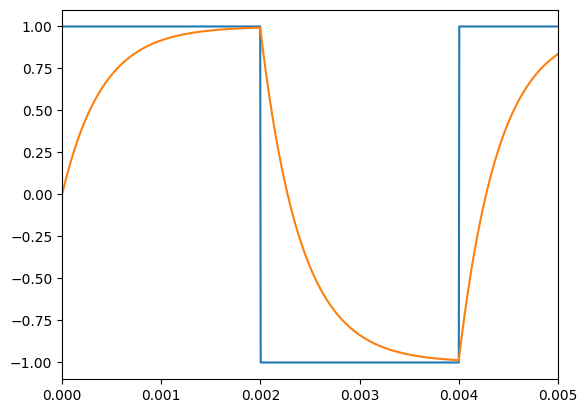

In [11]:
# Code fourni
# Filtre 1 : passe bas d'ordre 1 avec fc=0.1*f0
s0 = 0
N = 1000
tmin = 0
tmax = 5e-3
times = np.linspace(tmin, tmax, N)
e = crenau(times, 250)

def s(s0, e):
    wc = 2*np.pi*fc
    Te = (tmax-tmin)/N
    s = np.zeros(N)
    s[0] = s0
    for n in range(1, N):
        s[n] = s[n-1]/(1+wc*Te) + e[n]*wc*Te/(1+wc*Te)
    return s 

s1 = s(s0, e)

plt.plot(times, e)
plt.plot(times, s1)
plt.show()

9. Reproduire les courbes pour les filtres en utilisant la même méthode de la récurrence.

In [12]:
# Filtre 2 : passe pas d'ordre 2
s0 = 0
N = 1000
tmin = 0
tmax = 5e-3
times = np.linspace(tmin, tmax, N)
e = crenau(times, 250)

# Code à remplir par l'élève.